In [ ]:
#구글 Colab에서 실행할 때는 이 주석을 해제하시고 실행해서 pytorch 1.0을 깔아주세요!
!pip install -q torch==1.0.0 torchvision
import torch
print(torch.__version__)

     |████████████████████████████████| 591.8 MB 614 bytes/s 
     |████████████████████████████████| 23.3 MB 1.2 MB/s 
     |████████████████████████████████| 23.3 MB 60.1 MB/s 
     |████████████████████████████████| 22.1 MB 1.3 MB/s 
     |████████████████████████████████| 22.1 MB 1.3 MB/s 
     |████████████████████████████████| 17.4 MB 40.8 MB/s 
     |████████████████████████████████| 17.3 MB 39.4 MB/s 
     |████████████████████████████████| 12.8 MB 14.5 MB/s 
     |████████████████████████████████| 12.7 MB 65 kB/s 
     |████████████████████████████████| 11.8 MB 41.0 MB/s 
     |████████████████████████████████| 5.9 MB 61.7 MB/s 
     |████████████████████████████████| 6.6 MB 53.6 MB/s 
     |████████████████████████████████| 6.6 MB 31.5 MB/s 
     |████████████████████████████████| 4.0 MB 52.5 MB/s 
     |████████████████████████████████| 10.2 MB 56.9 MB/s 
     |████████████████████████████████| 10.1 MB 51.9 MB/s 
     |████████████████████████████████| 8.8 MB 39.0 MB/s 
    

### 1. Data Preparation

**Data Set**  
$$X_{train} \in \mathcal{R}^{50000 \times 784}, Y_{train} \in \mathcal{Z}^{50000}$$  
$$X_{val} \in \mathcal{R}^{10000 \times 784}, Y_{val} \in \mathcal{Z}^{10000}$$  
$$X_{test} \in \mathcal{R}^{10000 \times 784}, Y_{test} \in \mathcal{Z}^{10000}$$

In [ ]:
# 모듈 불러오기(기본 torch와 dataset 불러오기 )
import torch
from torchvision import datasets, transforms
import torch.nn as nn

# 학습 Batch_size(hyper parameter) 설정
batch_size = 128

# MNIST data 불러오기 
train_dataset = datasets.MNIST('./data', train=True, download=True,  # 대상 데이터가 Train 데이터임을 명시 
                   transform=transforms.Compose([                    # 데이터를 다운받을 때 이미지 전처리 동시 진행
                       transforms.ToTensor(),                        # 전처리1. image 사진을 tensor type으로 변환 후, [0, 1]로 변환(/255)
                       transforms.Normalize((0.1307,), (0.3081,))    # 전처리2. image 사진을 표준화 진행
                   ]))
test_dataset =  datasets.MNIST('./data', train=False, download=True, # 대상 데이터가 Test 데이터임을 명시 (이외 내용은 상동)
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))

train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [50000, 10000]) # Train 데이터에서 Random으로 train과 validation data로 변환(train: 50,000 / test: 10,000)
print(len(train_dataset), len(val_dataset), len(test_dataset))

# 다운로드한 MNIST data를 batch_size 단위로 분리해 저장
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True) # Train data loader(shuffle = True: 학습 과정에서 Label 순서를 암기하는 것을 방지)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=128, shuffle=False)    # validation data loader
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False)  # test data loader

9920512it [00:00, 36244923.33it/s]                            


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz


32768it [00:00, 428360.24it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 10145409.13it/s]                           


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 147265.07it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!
50000 10000 10000


### Inspecting Dataset

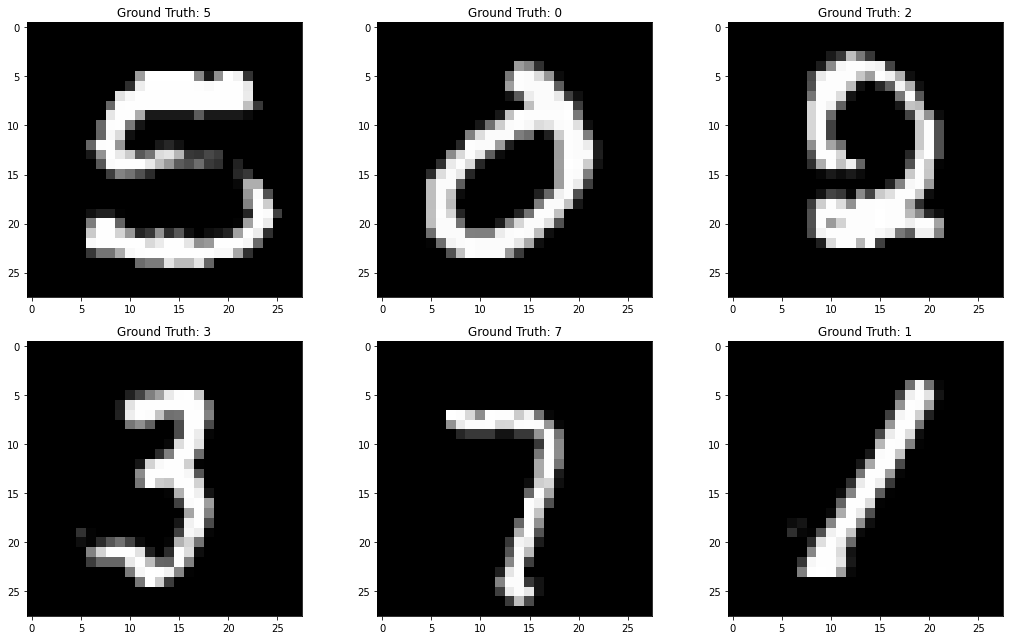

In [ ]:
examples = enumerate(train_loader)                          # batch 인덱스와 데이터를 분리해 받음
batch_idx, (example_data, example_targets) = next(examples) # 

# data image 확인
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 9))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(example_targets[i]))
plt.show()

### 2. Model Architecture

In [ ]:
# MNIST 이미지 하나의 크기는 [28*28]입니다. 그리고 MNIST 데이터셋의 클래스 갯수는 10개입니다.
# 이를 참고하여 한 층으로 구성된 linear model을 생성하기 위해서 빈칸 채우세요.

class LinearModel(nn.Module):              
    def __init__(self): 
        super(LinearModel, self).__init__()
        # ------------------빈 칸------------------#
        self.fc1 = nn.Linear(28 * 28, 10)   # first fully connected layer  : 입력 layer의 input의 크기(28 * 28)의 노드 수와 분류 하고자하는 class 개수(10)
        # -----------------------------------------#
    
    def forward(self, x):
        # ------------------빈 칸------------------#
        x = x.view(-1, 28 * 28)              # 이미지 데이터(2차원 / 흑백)를 1차원의 벡텉 값을 변환시키기 위해서 view 메서드를 활용함
        x = self.fc1(x)                      # 위에서 정의한 생성자 함수의 first fully connected layer 
        # -----------------------------------------#
        return x

### 3. Cost Function Define (Loss Function Define)  

In [ ]:
cls_loss = nn.CrossEntropyLoss()              # loss function 정의()

### 4. Train & Evaluation

In [ ]:
import torch.optim as optim
from sklearn.metrics import accuracy_score


model = LinearModel() # 모델 불러오기  
print('Number of {} parameters'.format(sum(p.numel() for p in model.parameters() if p.requires_grad)))


lr = 0.005                                       # 학습률
optimizer = optim.SGD(model.parameters(), lr=lr) # optimizer 정의(SGD)

# eopch 별 학습 결과 저장 list(epoch, epoch별 train과 validation loss와 accuracy 저장)
list_epoch = [] 
list_train_loss = []
list_val_loss = []
list_acc = []
list_acc_epoch = []

# 학습 epoch(횟수) 정의
epoch = 30 
for i in range(epoch):
    
    # (1) 학습 
    train_loss = 0    # train loss 값을 임시로 정의
    model.train()     # model train 상태로 지정(dropout 같은 경우 대비) 
    
    for input_X, true_y in train_loader:           # cf: size (batch, channel, width, hight) / 
        optimizer.zero_grad()                      # optimizer의 gradient 값 초기화(0)
        # ------------------빈 칸------------------#
        # 입력 데이터 처리
        input_X = input_X.squeeze()                # input_X의 채널 수(1) 제거 / 불필요한 차원
        # -----------------------------------------#
        pred_y = model(input_X)                    # image를 model에 넣어 예측 output 생성

        loss = cls_loss(pred_y.squeeze(), true_y)  # 예측값과 label 데이터 사이의 loss 값 계산(loss function: crossentrop)
        loss.backward()                            # 역전파 계산된 gradient를 parameter 할당
        optimizer.step()                           # gradient를 통해 parameter updata
        train_loss += loss.detach().numpy()        # batch별 loss를 numpy 형식으로 변환 뒤 loss값에 더함

    train_loss = train_loss / len(train_loader)    # batch별 평균 loss = 전체 loss / train_loader의 batch 수
    list_train_loss.append(train_loss)             # train_loss를 저장
    list_epoch.append(i)
    
    
    # (2) 검즘
    val_loss = 0      # vlidation loss 값을 임시로 정의
    model.eval()      # model test(평가) 상태로 대비 (train과 달리)
  
    with torch.no_grad(): # 
        for input_X, true_y in val_loader:         # 동일 코드는 위와 상동 
        # ------------------빈 칸------------------#
        # 입력 데이터 처리
            input_X = input_X.squeeze()
        # -----------------------------------------#
            pred_y = model(input_X)

            loss = cls_loss(pred_y.squeeze(), true_y)
            val_loss += loss.detach().numpy()
        val_loss = val_loss / len(val_loader)
        list_val_loss.append(val_loss)



    correct = 0      # test 정답 개수를 임시로 정의
    model.eval()     # 상동

    with torch.no_grad():
        for input_X, true_y in test_loader:
        # ------------------빈 칸------------------#
        # 입력 데이터 처리
            input_X = input_X.squeeze()
            pred_y = model(input_X)
            
        # 모델 출력 결과를 이용하여 모델이 이미지를 제대로 맞춘 개수를 출력하는 correct를 구현하세요
            prediction = pred_y.max(1, keepdim = True)[1] # max시 확률값(0)과 class 예측(1)을 저장 -> 정확도를 위해: 예측결과 / dim: armax할 차원 축(1임으로 하나의 사진별 argmax), keepdim = True: 연산축을 유지(사진별 label 비교, 80 * 1)
            correct += prediction.eq(true_y.view_as(prediction)).sum()  # 실제 label(true_y)를 예측값과 같은 형태로 만든 이후ㅔ[view_as] 맞춘 개수, 올바르게 예측한 횟수를 correct에 더함
 
        '''
        유사 코드 (코드 줄이기)
        correct = (prediction == true_y).sum()
        '''
        
        
        # -----------------------------------------#
        acc = correct.numpy() / len(test_loader.dataset)  # 평균 정확도 = 맞춘 개수 / batch 횟수
        list_acc.append(acc)
        list_acc_epoch.append(i)
    
    print('Epoch: {}, Train Loss: {}, Val Loss: {}, Test Acc: {}%'.format(i, train_loss, val_loss, round(acc*100, 2)))

Number of 7850 parameters
Epoch: 0, Train Loss: 0.7424107673375503, Val Loss: 0.4859323946735527, Test Acc: 88.28%
Epoch: 1, Train Loss: 0.4375393632275369, Val Loss: 0.4100449122960054, Test Acc: 89.65%
Epoch: 2, Train Loss: 0.39015988628272813, Val Loss: 0.37860573620735843, Test Acc: 90.16%
Epoch: 3, Train Loss: 0.36614090059419424, Val Loss: 0.36012680281566667, Test Acc: 90.62%
Epoch: 4, Train Loss: 0.3511778506095452, Val Loss: 0.3481017628425284, Test Acc: 90.86%
Epoch: 5, Train Loss: 0.34017141441554977, Val Loss: 0.3384627318834957, Test Acc: 91.07%
Epoch: 6, Train Loss: 0.3320106643316386, Val Loss: 0.33147166028052943, Test Acc: 91.29%
Epoch: 7, Train Loss: 0.32543700948700577, Val Loss: 0.3262204282645938, Test Acc: 91.3%
Epoch: 8, Train Loss: 0.3201021735396836, Val Loss: 0.3215570559230032, Test Acc: 91.46%
Epoch: 9, Train Loss: 0.3155867217675499, Val Loss: 0.3183654148744631, Test Acc: 91.48%
Epoch: 10, Train Loss: 0.3120186790785826, Val Loss: 0.314590842474865, Test A

### 5. Report Experiment  

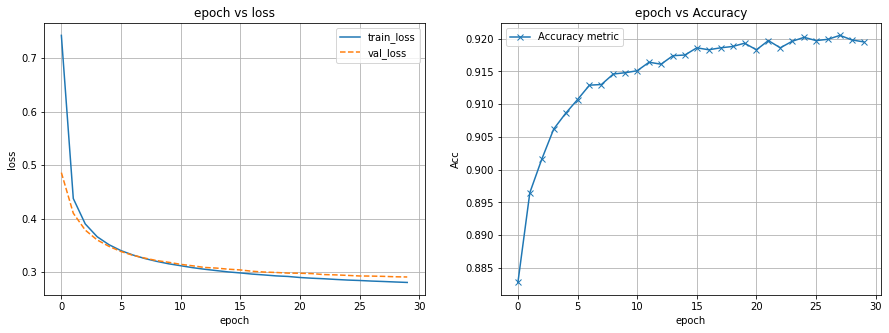

In [ ]:
fig = plt.figure(figsize=(15,5))

# ====== Loss Fluctuation ====== #
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

# ====== Metric Fluctuation ====== #
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_acc_epoch, list_acc, marker='x', label='Accuracy metric')
ax2.set_xlabel('epoch')
ax2.set_ylabel('Acc')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs Accuracy')

plt.show()